In [1]:
# importing pandas module for analysis
import pandas as pd

In [2]:
# loading required csv files or data
titanic = pd.read_csv('E:\\software\\files\\titanic\\gender_submission.csv')
train = pd.read_csv('E:\\software\\files\\titanic\\train.csv')
test = pd.read_csv('E:\\software\\files\\titanic\\test.csv')

In [3]:
train.info() # taking some info from data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [ ]:
# showing maximun columns and rows inthe notebook

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [55]:
import seaborn as sns # importing seaborn for data visualisation

In [56]:
import matplotlib.pyplot as plt # matplotlib for data visualisation also

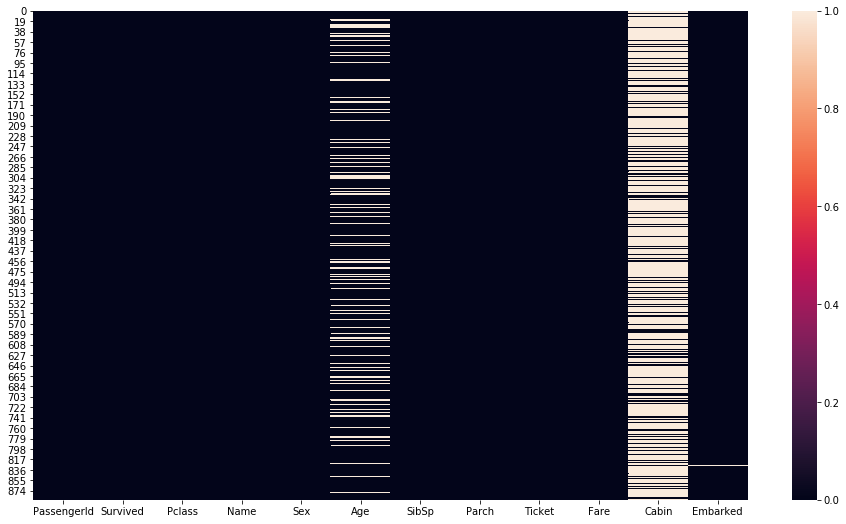

In [57]:
plt.figure(figsize=(16,9))   # to raise the figure size 
sns.heatmap(train.isnull()) # generating heat map 

In [29]:
train.isnull().sum()   #checking null values count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
# calculating percentage of missing data
prec_var = train.isnull().sum() / train.shape[0] * 100
prec_var

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [62]:
# removing column having missing value more than 19%
null_var = prec_var[prec_var > 19].keys()
null_var
        
    

Index(['Age', 'Cabin'], dtype='object')

In [65]:
drop_col = train.drop(columns= null_var) # dropped unnecessary data from columns or data missed columns

In [69]:
drop_col.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [70]:
drop_row_clean = drop_col.dropna(axis= 0) # dropped rows having missed data

In [71]:
drop_row_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

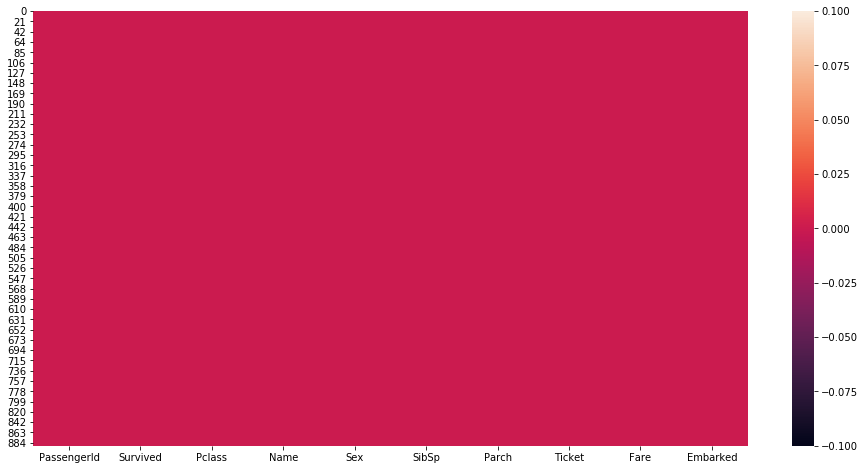

In [75]:
plt.figure(figsize=(16,8))
sns.heatmap(drop_row_clean.isnull())

In [76]:
cleaned_data = drop_row_clean.copy() # changed the variable name here by making copy of older data frame
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 62.5+ KB


In [77]:
cleaned_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C
